In [10]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\Philosophie\Downloads\eco2mix-regional-cons-def (1).csv', sep = ';')

# Display the first few rows of the dataframe

df.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
0,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,Bretagne,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,Île-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Extract only the "Date" and "Consommation (MW)" columns
df_timeseries = df[["Date", "Consommation (MW)"]]

# Display the first few rows of the new dataframe
df_timeseries.head()

,Date,Consommation (MW)
0,2013-01-01,NaN
1,2013-01-01,NaN
2,2013-01-01,NaN
3,2013-01-01,NaN
4,2013-01-01,NaN


In [12]:
# Fill the missing values in "Consommation (MW)" with its mean
mean_consumption = df_timeseries["Consommation (MW)"].mean()
df_timeseries_filled = df_timeseries.copy()
df_timeseries_filled["Consommation (MW)"] = df_timeseries_filled["Consommation (MW)"].fillna(mean_consumption)

# Check if there are any missing values left
missing_values_after_fill = df_timeseries_filled["Consommation (MW)"].isna().sum()
missing_values_after_fill

0

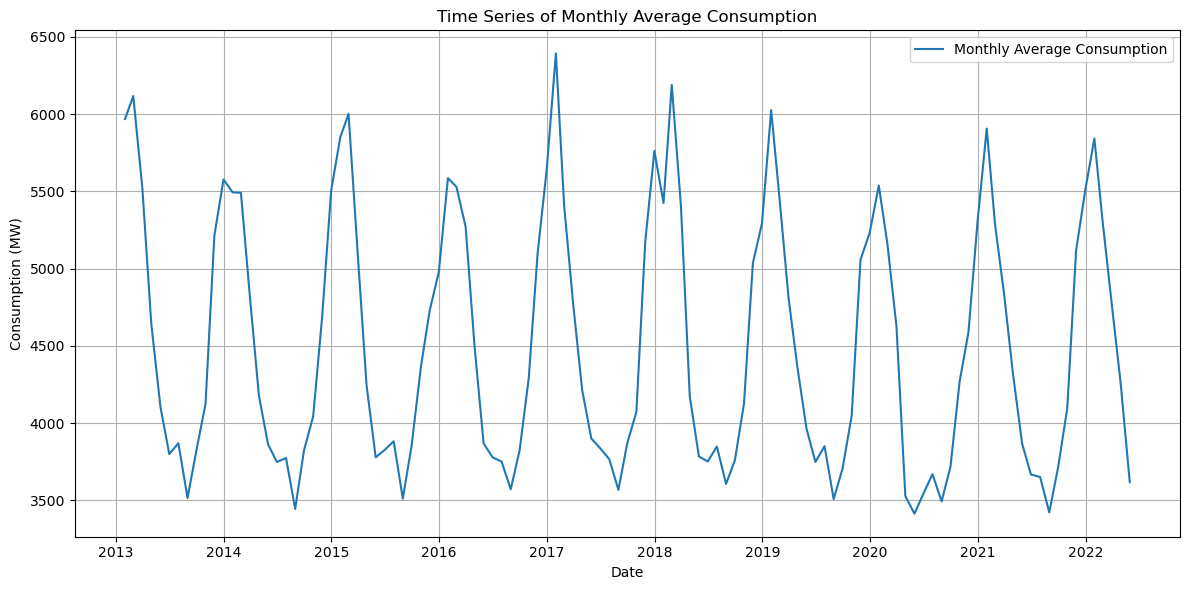

In [16]:
import matplotlib.pyplot as plt
# Attempt to load the dataset in chunks to optimize memory usage
chunk_iter = pd.read_csv(r"C:\Users\Philosophie\Downloads\eco2mix-regional-cons-def (1).csv", header=0, sep=";", chunksize=50000)

# Initialize an empty list to store each processed chunk
df_chunks = []

# Process each chunk
for chunk in chunk_iter:
    # Retain only the "Date" and "Consommation (MW)" columns
    chunk = chunk[["Date", 'Consommation (MW)']]
    
    # Convert the "Date" column to a datetime format
    chunk['Date'] = pd.to_datetime(chunk['Date'])
    
    # Fill missing values with the mean
    chunk['Consommation (MW)'] = chunk['Consommation (MW)'].fillna(mean_consumption)
    
    # Append the processed chunk to the list
    df_chunks.append(chunk)

# Concatenate all the processed chunks
df_time_series = pd.concat(df_chunks)

# Set the "Date" column as the index
df_time_series = df_time_series.set_index("Date")

# Resample the data by month and compute the mean for each month
df_time_series = df_time_series.resample('M').mean()

# Rename the "Consommation (MW)" column to "Consumption"
df_time_series.columns = ["Consumption"]

# Convert the dataframe to a series
df_time_series = df_time_series.squeeze()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df_time_series, label="Monthly Average Consumption")
plt.title("Time Series of Monthly Average Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

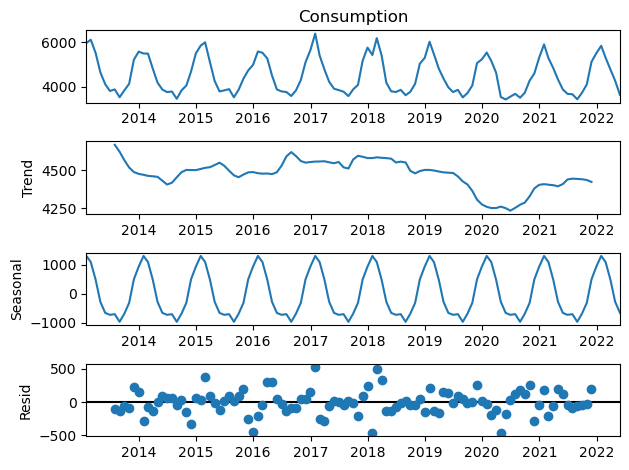

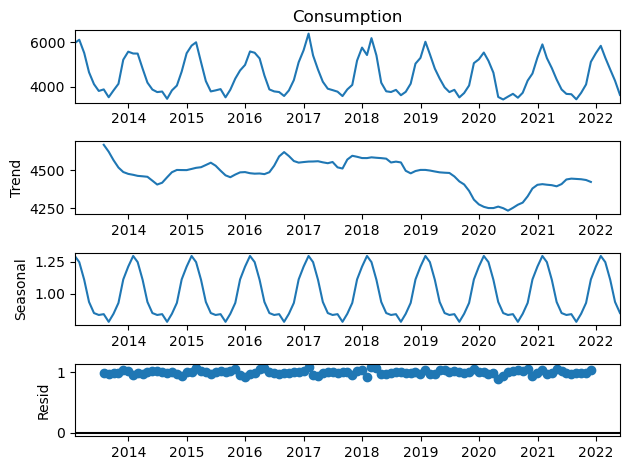

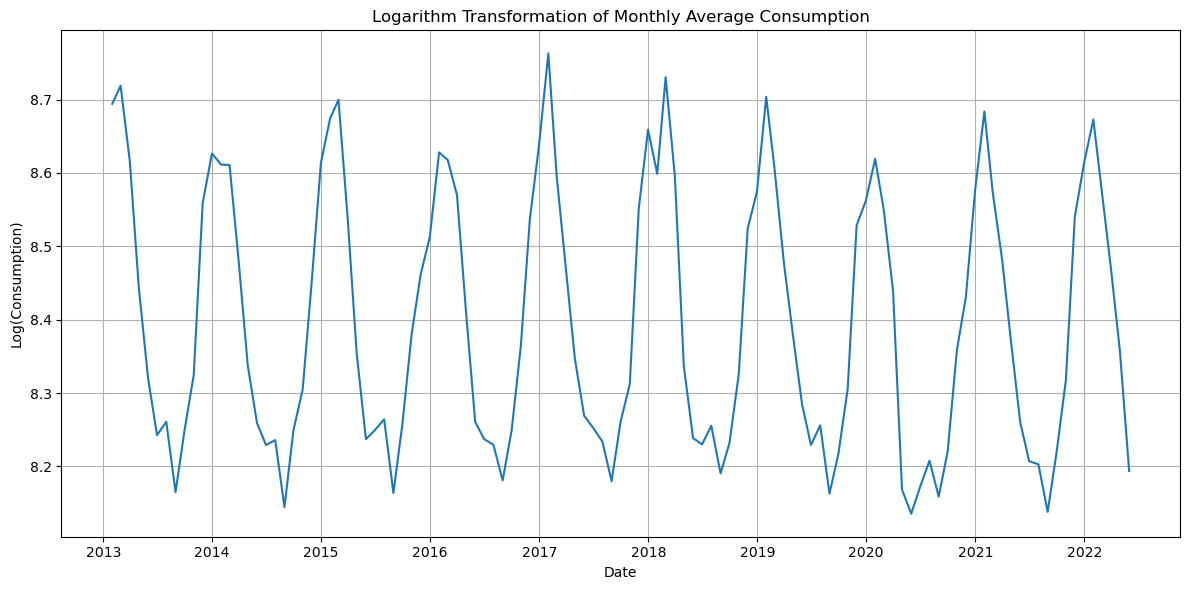

In [17]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition using the additive model
res_additive = seasonal_decompose(df_time_series)
fig_additive = res_additive.plot()

# Seasonal decomposition using the multiplicative model
res_multiplicative = seasonal_decompose(df_time_series, model='multiplicative')
fig_multiplicative = res_multiplicative.plot()

# Logarithm transformation
df_log = np.log(df_time_series)

# Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(df_log)
plt.title("Logarithm Transformation of Monthly Average Consumption")
plt.xlabel("Date")
plt.ylabel("Log(Consumption)")
plt.grid(True)
plt.tight_layout()
plt.show()

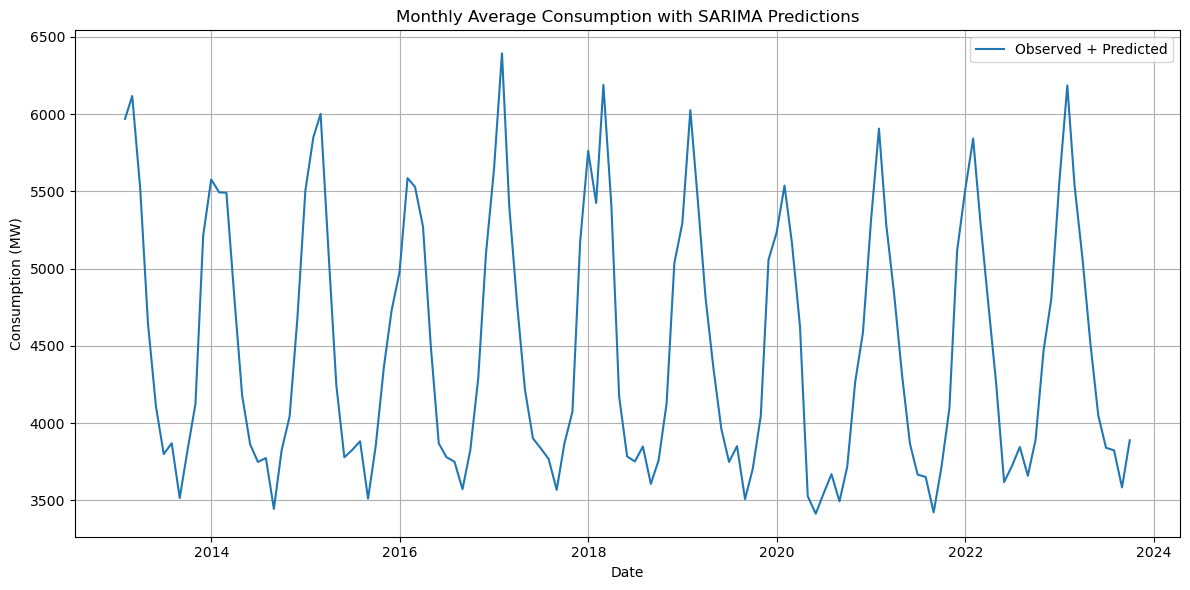

In [18]:
# Re-import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Re-process the data
df_time_series = pd.read_csv(r"C:\Users\Philosophie\Downloads\eco2mix-regional-cons-def (1).csv", header=0, sep=";")
df_time_series = df_time_series[["Date", 'Consommation (MW)']]
df_time_series['Date'] = pd.to_datetime(df_time_series['Date'])
df_time_series = df_time_series.set_index("Date")
df_time_series = df_time_series.resample('M').mean()
df_time_series.columns = ["Consumption"]
df_time_series = df_time_series.squeeze()
df_log = np.log(df_time_series)

# Define the SARIMA model with the specified parameters
model = sm.tsa.SARIMAX(df_log, order=(1, 1, 1), seasonal_order=(0, 1, 0, 24))

# Fit the model
sarima = model.fit(disp=False)

# Predict values
start_point = 113
end_point = 128
pred_log = sarima.predict(start=start_point, end=end_point)

# Convert predictions back to original scale
pred = np.exp(pred_log)

# Concatenate the original series with predictions
df_pred = pd.concat([df_time_series, pred])

# Plot the original series along with predictions
plt.figure(figsize=(12, 6))
plt.plot(df_pred, label="Observed + Predicted")
plt.title("Monthly Average Consumption with SARIMA Predictions")
plt.xlabel("Date")
plt.ylabel("Consumption (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
